In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow.keras as tf

In [10]:
ratings_df = pd.read_csv("C:/Users/LENOVO/Documents/Books/Newfolder/ratings.csv")
books_df = pd.read_csv("C:/Users/LENOVO/Documents/Books/Newfolder/books.csv")

In [11]:
ratings_df.head()

book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4

In [12]:
books_df.head()

id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   
3                     To Kill a Mockingbird  ...       3198671   
4                          The Great Gatsby  ...       2683664   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   
2            3916824                    95009     456191     436802   
3            3340896                    72586      60427     117415   
4            2773745                    51992      86236     197621   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   
2     793319     875073    1355439   
3     446835    1001952    1714267   
4     606158     936012     947718   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   

                                     small_image_url  
0  https://images.gr-assets.com/books/1447303603s...  
1  https://images.gr-assets.com/books/1474154022s...  
2  https://images.gr-assets.com/books/1361039443s...  
3  https://images.gr-assets.com/books/1361975680s...  
4  https://images.gr-assets.com/books/1490528560s...  

[5 rows x 23 columns]

In [13]:
print(ratings_df.shape)
print(ratings_df.user_id.nunique())
print(ratings_df.book_id.nunique())
ratings_df.isna().sum()

(981756, 3)
53424
10000


book_id    0
user_id    0
rating     0
dtype: int64

In [14]:


from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(ratings_df, test_size=0.2, random_state=1)
print(f"Shape of train data: {Xtrain.shape}")
print(f"Shape of test data: {Xtest.shape}")



Shape of train data: (785404, 3)
Shape of test data: (196352, 3)


In [15]:
nbook_id = ratings_df.book_id.nunique()
nuser_id = ratings_df.user_id.nunique()

In [16]:
input_books = tf.layers.Input(shape=[1])
embed_books = tf.layers.Embedding(nbook_id + 1,15)(input_books)
books_out = tf.layers.Flatten()(embed_books)

#user input network
input_users = tf.layers.Input(shape=[1])
embed_users = tf.layers.Embedding(nuser_id + 1,15)(input_users)
users_out = tf.layers.Flatten()(embed_users)

conc_layer = tf.layers.Concatenate()([books_out, users_out])
x = tf.layers.Dense(128, activation='relu')(conc_layer)
x_out = x = tf.layers.Dense(1, activation='relu')(x)
model = tf.Model([input_books, input_users], x_out)

In [17]:
opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 15)        150015      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 15)        801375      input_2[0][0]                    
______________________________________________________________________________________________

In [18]:


hist = model.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, 
                 batch_size=128, 
                 epochs=5, 
                 verbose=1,
                 validation_data=([Xtest.book_id, Xtest.user_id], Xtest.rating))



Epoch 1/5
6136/6136 [==============================] - 65s 10ms/step - loss: 0.9568 - val_loss: 0.7145
Epoch 2/5
6136/6136 [==============================] - 65s 11ms/step - loss: 0.6838 - val_loss: 0.7006
Epoch 3/5
6136/6136 [==============================] - 64s 10ms/step - loss: 0.6492 - val_loss: 0.6949
Epoch 4/5
6136/6136 [==============================] - 63s 10ms/step - loss: 0.6199 - val_loss: 0.6968
Epoch 5/5
6136/6136 [==============================] - 62s 10ms/step - loss: 0.5907 - val_loss: 0.7035


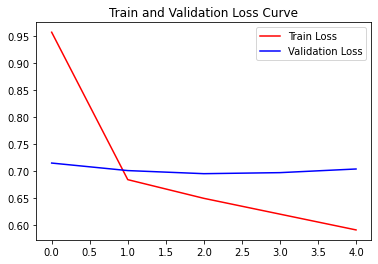

In [19]:
#Data Cleaning
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

In [20]:


model.save('model')
model.summary()



INFO:tensorflow:Assets written to: model\assets
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 15)        150015      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 15)        801375      input_2[0][0]                    
______________________________________________

In [21]:
book_em = model.get_layer('embedding')
book_em_weights = book_em.get_weights()[0]
book_em_weights.shape

(10001, 15)

In [22]:


books_df_copy = books_df.copy()
books_df_copy = books_df_copy.set_index("book_id")



In [23]:


b_id =list(ratings_df.book_id.unique())
b_id.remove(10000)
dict_map = {}
for i in b_id:
    dict_map[i] = books_df_copy.iloc[i]['title']
    
out_v = open('vecs.tsv', 'w')
out_m = open('meta.tsv', 'w')
for i in b_id:
    book = dict_map[i]
    embeddings = book_em_weights[i]
    out_m.write('book')
    out_v.write('/t'.join([str(x) for x in embeddings]) + '/n')
    
out_v.close()
out_m.close()



In [24]:
#Recommending Books for unique Id 250

In [25]:
book_arr = np.array(b_id) #get all book IDs
user = np.array([250 for i in range(len(b_id))])
pred = model.predict([book_arr, user])
pred

array([[4.9665728],
       [4.951853 ],
       [3.0445528],
       ...,
       [4.998632 ],
       [5.0216103],
       [4.383698 ]], dtype=float32)

In [26]:
pred = pred.reshape(-1) #reshape to single dimension
pred_ids = (-pred).argsort()[0:5]
pred_ids

array([6360, 6589, 5206, 3752, 6919], dtype=int64)

In [30]:
books_df.iloc[pred_ids]

id  book_id  best_book_id   work_id  books_count       isbn  \
6360  6361    70489         70489    170846           22  836213122   
6589  6590    59715         59715   1010526           21  751507954   
5206  5207    24818         24818    946589           28  836217357   
3752  3753       10            10  21457570            6  439827604   
6919  6920    24815         24815     25602           19  751500283   

            isbn13         authors  original_publication_year  \
6360  9.780836e+12  Bill Watterson                     1996.0   
6589  9.780752e+12  Bill Watterson                     1990.0   
5206  9.780836e+12  Bill Watterson                     1993.0   
3752  9.780440e+12    J.K. Rowling                     2005.0   
6919  9.780752e+12  Bill Watterson                     1992.0   

                                         original_title  ... ratings_count  \
6360  There's Treasure Everywhere: A Calvin and Hobb...  ...         16766   
6589                The Authoritative Calvin and Hobbes  ...         16087   
5206  The Days Are Just Packed: A Calvin and Hobbes ...  ...         19143   
3752       Harry Potter Collection (Harry Potter, #1-6)  ...         24618   
6919  The Indispensable Calvin and Hobbes: A Calvin ...  ...         14597   

     work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
6360              17285                      149         22         69   
6589              18198                      425         20         61   
5206              20374                      228        114        149   
3752              26274                      882        203        186   
6919              16911                      325         19         62   

      ratings_3  ratings_4  ratings_5  \
6360        680       2822      13692   
6589        701       3295      14121   
5206        942       3636      15533   
3752        946       3891      21048   
6919        666       2969      13195   

                                              image_url  \
6360  https://s.gr-assets.com/assets/nophoto/book/11...   
6589  https://images.gr-assets.com/books/1391114055m...   
5206  https://images.gr-assets.com/books/1418211162m...   
3752  https://images.gr-assets.com/books/1328867351m...   
6919  https://s.gr-assets.com/assets/nophoto/book/11...   

                                        small_image_url  
6360  https://s.gr-assets.com/assets/nophoto/book/50...  
6589  https://images.gr-assets.com/books/1391114055s...  
5206  https://images.gr-assets.com/books/1418211162s...  
3752  https://images.gr-assets.com/books/1328867351s...  
6919  https://s.gr-assets.com/assets/nophoto/book/50...  

[5 rows x 23 columns]

In [ ]:
#name of Team Member
Aman S. Kankariya
Amatya Trivedi
Divya Sharma
Eva Mathur
Himanshu Mishra